In [16]:
from pandas.io.json import json_normalize
import pandas as pd
import requests
import json

In [17]:
import requests
key = "b23ae1c1b2dd46a3463cc32a92a783f7"

### 获取地理编码

In [175]:
# A-1 地理编码（将详细的结构化地址转换为高德经纬度坐标，且支持对地标性名胜景区、建筑物名称解析为高德经纬度坐标）
def geocode(address,city=None,batch=None,sig=None)->dict:
    """获取地理编码"""
    url = 'https://restapi.amap.com/v3/geocode/geo?parameters'
    params={
        'key': key,
        'address':address,
        'city':city,
        'batch':batch,
        'sig':sig,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data
北大 = geocode(address='北京市海淀区颐和园路北京大学')
print(北大)
# 转化为表格
df_北大地理编码 = json_normalize(北大['geocodes'])
display(df_北大地理编码)
北大地理编码 = 北大['geocodes'][0]['location']
# 地理编码
print("北大地理编码:",北大地理编码)

{'status': '1', 'info': 'OK', 'infocode': '10000', 'count': '1', 'geocodes': [{'formatted_address': '北京市海淀区北京大学', 'country': '中国', 'province': '北京市', 'citycode': '010', 'city': '北京市', 'district': '海淀区', 'township': [], 'neighborhood': {'name': [], 'type': []}, 'building': {'name': [], 'type': []}, 'adcode': '110108', 'street': [], 'number': [], 'location': '116.310880,39.992810', 'level': '兴趣点'}]}


,adcode,building.name,building.type,city,citycode,country,district,formatted_address,level,location,neighborhood.name,neighborhood.type,number,province,street,township
0,110108,[],[],北京市,010,中国,海淀区,北京市海淀区北京大学,兴趣点,"116.310880,39.992810",[],[],[],北京市,[],[]


北大地理编码: 116.310880,39.992810


### 逆地理编码

In [121]:
# A-2 基础逆地理编码分析（将经纬度转换为详细结构化的地址，且返回附近周边的POI、AOI信息）
def regeocode(location,poitype=None,radius=None,extensions="base",batch=False,roadlevel=None,sig=None,homeorcorp=None)->dict:
    """获取逆地理编码"""
    url = 'https://restapi.amap.com/v3/geocode/regeo?parameters'
    params={
        'key': key,
        'location':location,
        'poitype':poitype,
        'radius':radius,
        'extensions':extensions,
        'batch':batch,
        'roadlevel':roadlevel,
        'homeorcorp':homeorcorp,
        'sig':sig,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data

北大逆地理编码 = regeocode(北大地理编码)
print(北大逆地理编码)
df_北大逆地理编码 = json_normalize(北大逆地理编码).T
display(df_北大逆地理编码)

{'status': '1', 'regeocode': {'addressComponent': {'city': [], 'province': '北京市', 'adcode': '110108', 'district': '海淀区', 'towncode': '110108015000', 'streetNumber': {'number': '5号', 'location': '116.310454,39.9927339', 'direction': '西', 'distance': '37.2753', 'street': '颐和园路'}, 'country': '中国', 'township': '燕园街道', 'businessAreas': [{'location': '116.314222,39.98249', 'name': '中关村', 'id': '110108'}, {'location': '116.303364,39.97641', 'name': '万泉河', 'id': '110108'}, {'location': '116.294214,39.99685', 'name': '西苑', 'id': '110108'}], 'building': {'name': [], 'type': []}, 'neighborhood': {'name': '北京大学', 'type': '科教文化服务;学校;高等院校'}, 'citycode': '010'}, 'formatted_address': '北京市海淀区燕园街道北京大学'}, 'info': 'OK', 'infocode': '10000'}


,0
info,OK
infocode,10000
regeocode.addressComponent.adcode,110108
regeocode.addressComponent.building.name,[]
regeocode.addressComponent.building.type,[]
regeocode.addressComponent.businessAreas,"[{'location': '116.314222,39.98249', 'name': '..."
regeocode.addressComponent.city,[]
regeocode.addressComponent.citycode,010
regeocode.addressComponent.country,中国
regeocode.addressComponent.district,海淀区


In [9]:
# A-2 Extra 全部逆地理编码分析
北大逆地理编码_all = regeocode(北大地理编码,extensions="all")
print(北大逆地理编码_all)
df_北大逆地理编码_all = json_normalize(北大逆地理编码_all)
display(df_北大逆地理编码_all)

{'status': '1', 'regeocode': {'roads': [{'id': '010J50F0010195630', 'location': '116.311,39.993', 'direction': '东南', 'name': '临湖路', 'distance': '26.2483'}, {'id': '010J50F0010195642', 'location': '116.311,39.9926', 'direction': '东北', 'name': '求知路', 'distance': '26.4269'}, {'id': '010J50F0010195645', 'location': '116.311,39.9923', 'direction': '西北', 'name': '五四路', 'distance': '56.0837'}], 'roadinters': [{'second_name': '临湖路', 'first_id': '010J50F0010195629', 'second_id': '010J50F0010195630', 'location': '116.3119769,39.99323472', 'distance': '104.708', 'first_name': '未名北路', 'direction': '西'}], 'formatted_address': '北京市海淀区燕园街道北京大学', 'addressComponent': {'city': [], 'province': '北京市', 'adcode': '110108', 'district': '海淀区', 'towncode': '110108015000', 'streetNumber': {'number': '5号', 'location': '116.310454,39.9927339', 'direction': '西', 'distance': '37.2753', 'street': '颐和园路'}, 'country': '中国', 'township': '燕园街道', 'businessAreas': [{'location': '116.314222,39.98249', 'name': '中关村', 'id': 

,info,infocode,regeocode.addressComponent.adcode,regeocode.addressComponent.building.name,regeocode.addressComponent.building.type,regeocode.addressComponent.businessAreas,regeocode.addressComponent.city,regeocode.addressComponent.citycode,regeocode.addressComponent.country,regeocode.addressComponent.district,...,regeocode.addressComponent.streetNumber.number,regeocode.addressComponent.streetNumber.street,regeocode.addressComponent.towncode,regeocode.addressComponent.township,regeocode.aois,regeocode.formatted_address,regeocode.pois,regeocode.roadinters,regeocode.roads,status
0,OK,10000,110108,[],[],"[{'location': '116.314222,39.98249', 'name': '...",[],010,中国,海淀区,...,5号,颐和园路,110108015000,燕园街道,"[{'area': '1871566.519603', 'type': '141201', ...",北京市海淀区燕园街道北京大学,"[{'id': 'B000A816R6', 'direction': '东', 'busin...","[{'second_name': '临湖路', 'first_id': '010J50F00...","[{'id': '010J50F0010195630', 'location': '116....",1


In [10]:
# A-3 分析细节
roads = json_normalize(北大逆地理编码_all['regeocode']['roads'])
roadinters = json_normalize(北大逆地理编码_all['regeocode']['roadinters'])
aois = json_normalize(北大逆地理编码_all['regeocode']['aois'])
pois = json_normalize(北大逆地理编码_all['regeocode']['pois'])
display(roads,roadinters,aois,pois)


,direction,distance,id,location,name
0,东南,26.2483,010J50F0010195630,"116.311,39.993",临湖路
1,东北,26.4269,010J50F0010195642,"116.311,39.9926",求知路
2,西北,56.0837,010J50F0010195645,"116.311,39.9923",五四路


,direction,distance,first_id,first_name,location,second_id,second_name
0,西,104.708,010J50F0010195629,未名北路,"116.3119769,39.99323472",010J50F0010195630,临湖路


,adcode,area,distance,id,location,name,type
0,110108,1871566.519603,0,B000A816R6,"116.310905,39.992806",北京大学,141201


,address,businessarea,direction,distance,id,location,name,poiweight,tel,type
0,颐和园路5号,中关村,东,2.17329,B000A816R6,"116.310905,39.992806",北京大学,0.806322,010-62752114,科教文化服务;学校;高等院校
1,颐和园路5号北京大学,中关村,南,106.525,B000A85J18,"116.310518,39.991893",calis全国文理文献信息中心,0.17778,[],科教文化服务;学校;高等院校
2,颐和园路5号北京大学,中关村,北,87.8436,B000A9LEA8,"116.310604,39.993571",北京大学陈守仁国际研究中心,0.216722,[],科教文化服务;科研机构;科研机构
3,颐和园路5号北京大学生物楼,中关村,东,76.8463,B000A7ORS4,"116.311762,39.992665",北京大学平民学校,0.273988,[],科教文化服务;学校;学校
4,颐和园路5号北京大学附近,中关村,西南,129.693,B000A85D1Z,"116.309910,39.991911",中国高校人文社会科学文献中心全国中心,0.196734,[],科教文化服务;科教文化场所;科教文化场所
5,颐和园路5号燕园北京大学,中关村,东,131.761,B000A7ORSJ,"116.312400,39.993029",北京大学数字中国研究院,0.287356,[],科教文化服务;科研机构;科研机构
6,颐和园路5号北京大学燕园,中关村,东,139.776,B000A7SU8O,"116.31245,39.993175",北京大学遥感与地理信息系统研究所,0.283138,010-62751962,科教文化服务;科研机构;科研机构
7,临湖路与未名北路交叉口南50米,中关村,东,84.7066,B0FFG4DZA1,"116.311865,39.992914",北京大学-广播台,0.202815,[],科教文化服务;传媒机构;传媒机构
8,颐和园路5号北京大学文史教学楼附近,中关村,东,107.881,B000AA1YH4,"116.312067,39.992472",北京大学生物基础教学实验中学生物化学实验室1,0.189818,[],科教文化服务;科研机构;科研机构
9,颐和园路5号北京大学地学楼,中关村,东南,149.729,B000A9QARU,"116.311877,39.991701",环境模拟与污染控制国家重点联合实验室(北京大学),0.2881,[],科教文化服务;科研机构;科研机构


### 步行路径规划

In [14]:
# B-1 准备base url、params、response.json（） 
def walking(origin,destination,sig=None)->dict:
    url = 'https://restapi.amap.com/v3/direction/walking?parameters'
    params={
        'key':key,
        'origin':origin,
        'destination':destination,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data

In [15]:
# B-2 准备walking 参数
故宫 = geocode('北京市故宫')
故宫_location = 故宫['geocodes'][0]['location']
北大_location = 北大['geocodes'][0]['location']
print("(起点)北大_location:",北大_location,"(终点)故宫_location:",故宫_location)

(起点)北大_location: 116.310880,39.992810 (终点)故宫_location: 116.407526,39.904030


In [16]:
# B-3 路径规划
北大_故宫 = walking(北大_location,故宫_location)
df_步行路径规划 = json_normalize(北大_故宫["route"]["paths"][0]['steps'])
display(df_步行路径规划)
df_步行路径规划["instruction"]

,action,assistant_action,distance,duration,instruction,orientation,polyline,road,walk_type
0,左转,[],27,22,向南步行27米左转,南,"116.310838,39.992804;116.310859,39.992635;116....",[],0
1,右转,[],36,29,沿求知路向东南步行36米右转,东南,"116.310803,39.992565;116.311055,39.992374;116....",求知路,0
2,左转,[],651,521,沿五四路向南步行651米左转,南,"116.311115,39.992344;116.311141,39.991914;116....",五四路,0
3,右转,[],378,302,沿海淀路向东步行378米右转,东,"116.311545,39.986419;116.312695,39.986454;116....",海淀路,0
4,向右前方行走,[],46,37,沿中关村北大街向南步行46米向右前方行走,南,"116.315985,39.986454;116.316007,39.986033",中关村北大街,0
5,左转,[],221,177,步行221米左转,[],"116.316007,39.986029;116.315929,39.986033;116....",[],4
6,向左前方行走,[],87,70,沿中关村大街向南步行87米向左前方行走,南,"116.316489,39.984896;116.316502,39.984727;116....",中关村大街,0
7,向右前方行走,[],25,20,沿中关村大街向东南步行25米向右前方行走,东南,"116.316541,39.98411;116.31671,39.983928",中关村大街,0
8,左转,[],882,706,沿中关村大街向南步行882米左转,南,"116.31671,39.983924;116.31674,39.983559;116.31...",中关村大街,0
9,向右前方行走,[],22,18,沿知春路向东南步行22米向右前方行走,东南,"116.317635,39.975968;116.317778,39.975894;116....",知春路,0


0                  向南步行27米左转
1             沿求知路向东南步行36米右转
2             沿五四路向南步行651米左转
3             沿海淀路向东步行378米右转
4       沿中关村北大街向南步行46米向右前方行走
5                   步行221米左转
6        沿中关村大街向南步行87米向左前方行走
7       沿中关村大街向东南步行25米向右前方行走
8           沿中关村大街向南步行882米左转
9         沿知春路向东南步行22米向右前方行走
10            向南步行384米向左前方行走
11          沿中关村大街向南步行675米左转
12    沿北三环西路辅路向东步行511米向右前方行走
13    沿北三环西路辅路向东步行579米向右前方行走
14        沿北三环西路辅路向东步行607米右转
15      沿四道口北街向南步行485米向左前方行走
16      沿四道口路向东南步行646米向左前方行走
17            向东步行257米向右前方行走
18       沿学院南路向东步行655米向右前方行走
19               向东步行1202米右转
20        沿新街口外大街向南步行1058米左转
21     沿德胜门西大街向东步行425米向右前方行走
22                  步行177米右转
23           沿德胜门桥向东南步行38米直行
24          沿德胜门内大街向东步行50米直行
25          沿鼓楼西大街向东南步行1204米
26      沿鼓楼西大街向东步行366米向右前方行走
27          沿鼓楼西大街向东南步行75米右转
28           沿地安门外大街向南步行634米
29         沿地安门外大街向南步行111米直行
30         沿地安门内大街向南步行551米左转
31       沿景山后街向东步行223米向右前方行走
32           沿景山东街向南步行565米左转
33           沿景山前街向东步行244米右转
34          沿北

### 公交路线规划

In [17]:
# C-1
def integrated(origin,destination,city,cityd=None,extensions='base',strategy=None,nightflag=0,date=None,time=None,sig=None)->dict:
    url = 'https://restapi.amap.com/v3/direction/transit/integrated?parameters'
    params={
        'key':key,
        'origin':origin,
        'destination':destination,
        'city':city,
        'cityd':cityd,
        'extensions':extensions,
        'strategy':strategy,
        'nightflag':nightflag,
        'date':date,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data

# C-2 准备walking 参数
北大 = geocode('北京市海淀区颐和园路北京大学')
北大_location = 北大['geocodes'][0]['location']
南锣鼓巷 = geocode('北京市南锣鼓巷')
南锣鼓巷_location = 南锣鼓巷['geocodes'][0]['location']
print("(起点)北大_location:",北大_location,"(终点)南锣鼓巷_location:",南锣鼓巷_location)

# C-3 公交路径规划
北大_南锣鼓巷 = integrated(北大_location,南锣鼓巷_location,city='北京',extensions='all')
df_bus = json_normalize(北大_南锣鼓巷)
df_bus

(起点)北大_location: 116.310880,39.992810 (终点)南锣鼓巷_location: 116.403242,39.934576


,count,info,infocode,route.destination,route.distance,route.origin,route.taxi_cost,route.transits,status
0,5,OK,10000,"116.403242,39.934576",15690,"116.310880,39.992810",42.98049999999999,"[{'cost': '5.0', 'duration': '2532', 'nightfla...",1


In [18]:
json_normalize(北大_南锣鼓巷["route"]['transits'])

,cost,distance,duration,emergency.busid,emergency.busname,emergency.esdescription,emergency.esstatus,emergency.eventTagDesc,emergency.ldescription,emergency.linetype,emergency.ssdescription,emergency.ssstatus,missed,nightflag,segments,walking_distance
0,5.0,14340,2532,110100023340,地铁6号线,[],[],提示,地铁6号线线路调整:自3月31日起，地铁6号线采取多交路和大站快车运营模式。每日7:43至8...,2,[],[],0,0,"[{'taxi': [], 'walking': {'origin': '116.31083...",1099
1,5.0,13682,2480,110100023115,地铁8号线,[],[],提示,地铁8号线线路调整:自4月8日起，8号线最小行车间隔为2分；采取多交路运营模式，早晚高峰期间...,2,[],[],0,0,"[{'taxi': [], 'walking': {'origin': '116.31083...",766
2,6.0,14459,3378,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,"[{'taxi': [], 'walking': {'origin': '116.31083...",1039
3,4.0,13639,5200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,"[{'taxi': [], 'walking': {'origin': '116.31083...",905
4,5.0,14622,5021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,"[{'taxi': [], 'walking': {'origin': '116.31083...",1078


In [19]:
json_normalize(北大_南锣鼓巷["route"]['transits'][0]['segments'])

,bus.buslines,entrance,entrance.location,entrance.name,exit,exit.location,exit.name,railway.alters,railway.spaces,railway.via_stops,taxi,walking.destination,walking.distance,walking.duration,walking.origin,walking.steps
0,"[{'departure_stop': {'name': '北京大学东门', 'id': '...",NaN,"116.315376,39.992718",A西北口,[],NaN,NaN,[],[],[],[],"116.315849,39.992214",546,468,"116.310837,39.992805","[{'instruction': '步行26米右转', 'road': [], 'dista..."
1,"[{'departure_stop': {'name': '平安里', 'id': '110...",[],NaN,NaN,NaN,"116.403076,39.933659",E西北口,[],[],[],[],"116.371262,39.932659",286,245,"116.372887,39.933945","[{'instruction': '步行286米到达平安里', 'road': [], 'd..."
2,[],[],NaN,NaN,[],NaN,NaN,[],[],[],[],"116.403152,39.934574",267,228,"116.402992,39.933121","[{'instruction': '步行167米左转', 'road': [], 'dist..."


In [20]:
df_bus_基本信息 = json_normalize(北大_南锣鼓巷["route"]['transits'][0]['segments'][0]['bus']["buslines"])
df_bus_基本信息

,arrival_stop.id,arrival_stop.location,arrival_stop.name,bustimetag,departure_stop.id,departure_stop.location,departure_stop.name,distance,duration,end_time,id,name,polyline,start_time,type,via_num,via_stops
0,110100023076015,"116.372883,39.933949",平安里,0,110100023076006,"116.315842,39.992212",北京大学东门,10661,1205,[],110100023076,地铁4号线大兴线(安河桥北--天宫院),"116.315842,39.992212;116.315920,39.991102;116....",[],地铁线路,8,"[{'name': '中关村', 'id': '110100023076007', 'loc..."


In [40]:
# C-4 公交车信息处理结果
地铁路线 = json_normalize(北大_南锣鼓巷["route"]['transits'][0]['segments'][0]['bus']["buslines"][0]["via_stops"]).rename(columns={"name":"地铁路线"})


display(地铁路线)

,id,location,地铁路线
0,110100023076007,"116.316467,39.983991",中关村
1,110100023076008,"116.317564,39.975996",海淀黄庄
2,110100023076009,"116.321367,39.966956",人民大学
3,110100023076010,"116.323220,39.957904",魏公村
4,110100023076011,"116.325190,39.943114",国家图书馆
5,110100023076012,"116.339031,39.938250",动物园
6,110100023076013,"116.355426,39.940474",西直门
7,110100023076014,"116.367742,39.940667",新街口


### 行政区域查询

In [93]:
# D-1 请注意行政区域级别划分参数
def district(keywords,subdistrict=None,page=None,offset=None,extensions='base',filter=None,)->dict:
    url = 'https://restapi.amap.com/v3/config/district?parameters'
    params={
        'key':key,
        'keywords':keywords,
        'subdistrict':subdistrict,
        'page':page,
        'offset':offset,
        'extensions':extensions,
        'filter':filter,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data
行政区域 = district(keywords='福建',extensions='all',subdistrict=2)

df_行政区域_1级 = json_normalize(行政区域["districts"][0]['districts'])

df_行政区域_2级_厦门市 = json_normalize(行政区域["districts"][0]['districts'][4]['districts'])
display(df_行政区域_1级,df_行政区域_2级_厦门市)



,adcode,center,citycode,districts,level,name
0,350100,"119.306239,26.075302",0591,"[{'citycode': '0591', 'adcode': '350121', 'nam...",city,福州市
1,350900,"119.527082,26.65924",0593,"[{'citycode': '0593', 'adcode': '350924', 'nam...",city,宁德市
2,350800,"117.02978,25.091603",0597,"[{'citycode': '0597', 'adcode': '350881', 'nam...",city,龙岩市
3,350700,"118.178459,26.635627",0599,"[{'citycode': '0599', 'adcode': '350723', 'nam...",city,南平市
4,350200,"118.11022,24.490474",0592,"[{'citycode': '0592', 'adcode': '350203', 'nam...",city,厦门市
5,350600,"117.661801,24.510897",0596,"[{'citycode': '0596', 'adcode': '350629', 'nam...",city,漳州市
6,350300,"119.007558,25.431011",0594,"[{'citycode': '0594', 'adcode': '350302', 'nam...",city,莆田市
7,350500,"118.589421,24.908853",0595,"[{'citycode': '0595', 'adcode': '350526', 'nam...",city,泉州市
8,350400,"117.635001,26.265444",0598,"[{'citycode': '0598', 'adcode': '350402', 'nam...",city,三明市


,adcode,center,citycode,districts,level,name
0,350203,"118.087828,24.462059",0592,[],district,思明区
1,350213,"118.242811,24.637479",0592,[],district,翔安区
2,350206,"118.10943,24.512764",0592,[],district,湖里区
3,350211,"118.100869,24.572874",0592,[],district,集美区
4,350205,"118.036364,24.492512",0592,[],district,海沧区
5,350212,"118.150455,24.729333",0592,[],district,同安区


### 搜索POI

### 关键字搜索

In [51]:
# E-1
def place_text(keywords,types,city=None,citylimit=None,children=None,page=None,extensions='base',sig=None)->dict:
    url = 'https://restapi.amap.com/v3/place/text?parameters'
    params={
        'key':key,
        'keywords':keywords,
        'types':types,
        'city':city,
        'citylimit':citylimit,
        'children':children,
        'page':page,
        'extensions':extensions,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data

北京_大学 = place_text('大学','高等院校',city="北京市",children=1,extensions='all')
北京_大学



{'status': '1',
 'count': '569',
 'info': 'OK',
 'infocode': '10000',
 'suggestion': {'keywords': [], 'cities': []},
 'pois': [{'id': 'B000A84APP',
   'parent': [],
   'childtype': [],
   'name': '中央音乐学院',
   'tag': [],
   'type': '科教文化服务;学校;高等院校',
   'typecode': '141201',
   'biz_type': [],
   'address': '鲍家街43号',
   'location': '116.359501,39.90268',
   'tel': '010-66425746',
   'postcode': [],
   'website': 'www.ccom.edu.cn',
   'email': [],
   'pcode': '110000',
   'pname': '北京市',
   'citycode': '010',
   'cityname': '北京市',
   'adcode': '110102',
   'adname': '西城区',
   'importance': [],
   'shopid': [],
   'shopinfo': '0',
   'poiweight': [],
   'gridcode': '5916628802',
   'distance': [],
   'navi_poiid': 'J50F002019_262772',
   'entr_location': '116.357967,39.903402',
   'business_area': '西便门',
   'exit_location': [],
   'match': '0',
   'recommend': '0',
   'timestamp': '2020-03-20 17:41:19',
   'alias': '央音',
   'indoor_map': '0',
   'indoor_data': {'cpid': [], 'floor': [], 'tr

In [53]:
df_北京_大学 = json_normalize(北京_大学["pois"])
df_北京_大学_北京大学 = json_normalize(北京_大学["pois"][7]["children"])
display(df_北京_大学,df_北京_大学_北京大学)


,adcode,address,adname,alias,biz_ext.cost,biz_ext.rating,biz_type,business_area,children,childtype,...,postcode,recommend,shopid,shopinfo,tag,tel,timestamp,type,typecode,website
0,110102,鲍家街43号,西城区,央音,[],[],[],西便门,"[{'id': ' B000A84AP6 ', 'name': ' 中央音乐学院(西门) '...",[],...,[],0,[],0,[],010-66425746,2020-03-20 17:41:19,科教文化服务;学校;高等院校,141201,www.ccom.edu.cn
1,110108,双清路30号,海淀区,[],[],[],[],[],"[{'id': ' B000A7GRM1 ', 'name': ' 清华大学(南门) ', ...",[],...,[],0,[],0,[],010-62793001,2020-04-19 05:51:32,科教文化服务;学校;高等院校,141201,www.tsinghua.edu.cn
2,110108,中关村大街59号,海淀区,人大|中国人民大学中关村校区,[],[],[],[],"[{'id': ' B000A849EW ', 'name': ' 中国人民大学(西北1门)...",[],...,100086,0,[],0,[],010-62510663;010-62516615,2020-04-19 05:55:04,科教文化服务;学校;高等院校,141201,www.ruc.edu.cn
3,110105,定福庄东街1号,朝阳区,中媒|北京传媒大学,[],[],[],定福庄,"[{'id': ' B000A8759X ', 'name': ' 中国传媒大学(南大门) ...",[],...,[],0,[],0,[],010-65779460;010-65779319;010-65783893,2020-04-19 10:39:53,科教文化服务;学校;高等院校,141201,[]
4,110114,北农路2号,昌平区,华电,[],[],[],回龙观,"[{'id': ' B000A875LJ ', 'name': ' 华北电力大学(西北门) ...",[],...,[],0,[],0,[],010-80798509,2020-03-25 11:41:03,科教文化服务;学校;高等院校,141201,www.ncepu.edu.cn
5,110114,高教园南三街9号,昌平区,航空航天大学沙河校区,[],[],[],沙河,"[{'id': ' B000A87JYT ', 'name': ' 北京航空航天大学沙河校区...",[],...,[],0,[],0,[],010-61716606,2020-03-25 12:42:42,科教文化服务;学校;高等院校,141201,[]
6,110111,良乡镇良乡东路,房山区,理工大学良乡南校区,[],3.0,[],良乡,[],[],...,[],0,[],0,[],010-81382972;010-81382768,2020-03-20 15:38:02,科教文化服务;学校;高等院校,141201,[]
7,110101,北极阁三条胡同26,东城区,[],[],3.0,[],东单,[],309,...,[],0,[],0,[],[],2020-04-14 17:02:18,科教文化服务;学校;高等院校,141201,[]
8,110108,颐和园路5号,海淀区,PKU|北京大学燕园校区|北大,[],[],[],[],"[{'id': ' B000A7VMCM ', 'name': ' 北京大学(南门) ', ...",[],...,[],0,[],0,[],010-62752114,2020-04-19 06:00:45,科教文化服务;学校;高等院校,141201,www.pku.edu.cn
9,110108,学院路37号,海淀区,北航,[],[],[],[],"[{'id': ' B000A81IGP ', 'name': ' 北京航空航天大学学院路校...",[],...,100191,0,[],0,[],010-82317114;010-82316114,2020-04-19 02:27:07,科教文化服务;学校;高等院校,141201,www.buaa.edu.cn


""


### 周边搜索

In [54]:
# F-1 
def place_around(location,keywords=None,types=None,city=None,redius=None,sortrule=None,offset=None,page=None,extensions='base',sig=None)->dict:
    url = 'https://restapi.amap.com/v3/place/around?parameters'
    params={
        'key':key,
        'keywords':keywords,
        'location':location,
        'types':types,
        'city':city,
        'redius':redius,
        'sortrule':sortrule,
        'offset':offset,
        'page':page,
        'extensions':extensions,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data


In [56]:
# F-2 json信息
北京大学_周边POI = place_around(北大_location)
北京大学_周边POI

{'status': '1',
 'count': '885',
 'info': 'OK',
 'infocode': '10000',
 'suggestion': {'keywords': [], 'cities': []},
 'pois': [{'id': 'B0FFJHFSKR',
   'parent': 'B000A816R6',
   'childtype': '0',
   'name': '电话室',
   'type': '生活服务;生活服务场所;生活服务场所',
   'typecode': '070000',
   'biz_type': [],
   'address': '颐和园路5号北京大学',
   'location': '116.311965,39.992931',
   'tel': [],
   'distance': '93',
   'biz_ext': [],
   'importance': [],
   'shopid': [],
   'shopinfo': '0',
   'poiweight': [],
   'photos': []},
  {'id': 'B0FFFAIBFX',
   'parent': [],
   'childtype': [],
   'name': '中国联通(北大合作厅)',
   'type': '生活服务;电讯营业厅;中国联通营业厅',
   'typecode': '070604',
   'biz_type': [],
   'address': '颐和园路5号北京大学燕东园',
   'location': '116.312026,39.992940',
   'tel': [],
   'distance': '98',
   'biz_ext': [],
   'importance': [],
   'shopid': [],
   'shopinfo': '0',
   'poiweight': [],
   'photos': []},
  {'id': 'B0FFKQHHZJ',
   'parent': [],
   'childtype': [],
   'name': '北京未名湖图文',
   'type': '生活服务;摄影冲印店;摄影冲印',

In [57]:
# F-3 表格化，可扩展pandas处理
df_北京大学_周边POI = json_normalize(北京大学_周边POI['pois'])
df_北京大学_周边POI

,address,biz_ext,biz_type,childtype,distance,id,importance,location,name,parent,photos,poiweight,shopid,shopinfo,tel,type,typecode
0,颐和园路5号北京大学,[],[],0,93,B0FFJHFSKR,[],"116.311965,39.992931",电话室,B000A816R6,[],[],[],0,[],生活服务;生活服务场所;生活服务场所,070000
1,颐和园路5号北京大学燕东园,[],[],[],98,B0FFFAIBFX,[],"116.312026,39.992940",中国联通(北大合作厅),[],[],[],[],0,[],生活服务;电讯营业厅;中国联通营业厅,070604
2,颐和园路5号北京大学内,[],[],[],131,B0FFKQHHZJ,[],"116.312403,39.992980",北京未名湖图文,[],[],[],[],0,010-82618585,生活服务;摄影冲印店;摄影冲印,071300
3,[],[],[],[],134,B0FFIENTVV,[],"116.312392,39.993138",复印装订,[],[],[],[],0,[],生活服务;摄影冲印店;摄影冲印,071300
4,北大吕志和楼1层,[],diner,[],204,B0FFKH60FE,[],"116.313178,39.992291",瑞幸咖啡(北京大学店),[],[],[],[],0,[],餐饮服务;咖啡厅;咖啡厅,050500
5,北京大学内,[],diner,309,258,B000A7R04W,[],"116.310213,39.990541",北京大学燕南美食,B000A816R6,[],[],[],0,010-62753319;010-62755019,餐饮服务;中餐厅;中餐厅,050100
6,颐和园路5号北京大学百周年纪念讲堂内,[],diner,[],281,B000A8X3G9,[],"116.310738,39.990285",泊星地咖啡馆(北京大学店),[],[],[],[],0,[],餐饮服务;咖啡厅;咖啡厅,050500
7,五四路,[],[],309,293,B0FFH1B076,[],"116.311117,39.990176",北京大学百周年纪念讲堂售票处,B000A816R6,[],[],[],2,010-62758452,生活服务;售票处;售票处,070300
8,颐和园路5号,[],[],309,339,B000A8W9SI,[],"116.314133,39.994571",北京大学微纳电子大厦,B000A816R6,[],[],[],0,[],商务住宅;楼宇;商务写字楼,120201
9,北京大学,[],[],0,341,B000A96EQ5,[],"116.308884,39.995474",红四楼,B000A816R6,[],[],[],0,[],商务住宅;住宅区;住宅小区,120302


### 多边形搜索

### 静态地图

In [ ]:
import sys
>>> from PIL import Image
>>> from io import BytesIO

>>> i = Image.open(BytesIO(r.content))

In [148]:
from PIL import Image
from io import BytesIO
def staticmap(location,zoom,size=None,scale=1,markers=None,labels=None,paths=None,traffic=0,page=None,sig=None)->dict:
    url = 'https://restapi.amap.com/v3/staticmap?parameters'
    params={
        'key':key,
        'location':location,
        'zoom':zoom,
        'size':size,
        'scale':scale,
        'markers':markers,
        'labels':labels,
        'paths':paths,
        'traffic':traffic,
        'sig':sig,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = Image.open(BytesIO(response.content))
    return data

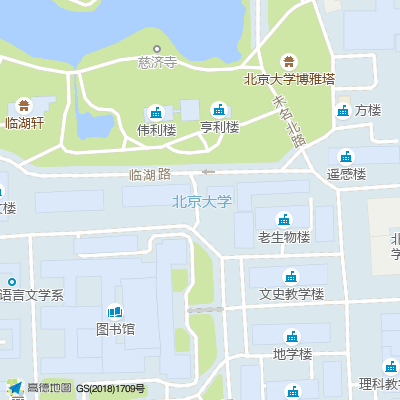

In [149]:
staticmap(location=北大_location,zoom=16)

### 坐标转换

In [157]:
# 坐标转换
def coordinate(key,locations,coordsys,sig=None)->dict:
    url = 'https://restapi.amap.com/v3/assistant/coordinate/convert?parameters'
    params={
        'key':key,
        'locations':locations,
        'coordsys':coordsys,
        'output':'json'
    }
    response = requests.get(url,params)
    data = response.json()
    return data

In [178]:
坐标转换 = coordinate(key,locations='116.310880,39.992810|116.310880,39.992810',coordsys='gps')
坐标转换

{'status': '1',
 'info': 'ok',
 'infocode': '10000',
 'locations': '116.316986219619,39.99409233941;116.316986219619,39.99409233941'}

## 天气查询

In [140]:
# 天气查询
def weather(key,city,extensions='base',sig=None)->dict:
    url = 'https://restapi.amap.com/v3/weather/weatherInfo?parameters'
    params={
        'key':key,
        'city':city,
        'extensions':extensions,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data


In [180]:
北京天气 = weather(key,city='北京',extensions='base')
北京天气

{'status': '1',
 'count': '1',
 'info': 'OK',
 'infocode': '10000',
 'lives': [{'province': '北京',
   'city': '北京市',
   'adcode': '110000',
   'weather': '晴',
   'temperature': '12',
   'winddirection': '西北',
   'windpower': '≤3',
   'humidity': '10',
   'reporttime': '2020-04-21 15:28:36'}]}

## 输入提示

In [176]:
# 输入提示
def assistant(key,keywords,city,citylimit=False,types=None,location=None,datatype=all,extensions='base',sig=None,callback=None)->dict:
    url = 'https://restapi.amap.com/v3/assistant/inputtips?parameters'
    params={
        'key':key,
        'keywords':keywords,
        'types':types,
        'location':location,
        'city':city,
        'citylimit':citylimit,
        'datatype':datatype,
        'sig':sig,
        'callback':callback,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data


In [183]:
北京麦当劳 = assistant(key,keywords='麦当劳',city='北京')
北京麦当劳

{'status': '1',
 'count': '10',
 'info': 'OK',
 'infocode': '10000',
 'tips': [{'id': 'B000A84AQB',
   'name': '麦当劳(新王府井店)',
   'district': '北京市东城区',
   'adcode': '110101',
   'location': '116.411675,39.910742',
   'address': '王府井大街200号工美大厦1层',
   'typecode': '050302',
   'city': []},
  {'id': 'B000A8UI43',
   'name': '麦当劳(祈年大街得来速店)',
   'district': '北京市东城区',
   'adcode': '110101',
   'location': '116.412544,39.899665',
   'address': '东打磨厂街7号新活馆1层',
   'typecode': '050302',
   'city': []},
  {'id': 'B000A8W9HN',
   'name': '麦当劳(前门西大街店)',
   'district': '北京市西城区',
   'adcode': '110102',
   'location': '116.394252,39.899739',
   'address': '前门西大街正阳市场2号',
   'typecode': '050302',
   'city': []},
  {'id': 'B000A81GQ4',
   'name': '麦当劳(北京apm)',
   'district': '北京市东城区',
   'adcode': '110101',
   'location': '116.411580,39.914692',
   'address': '王府井大街138号新东安1号楼APM2层',
   'typecode': '050302',
   'city': []},
  {'id': 'B000A8WBM4',
   'name': '麦当劳(大栅栏店)',
   'district': '北京市西城区',
   'adcode': 

In [184]:
# 表格化，可扩展pandas处理
df_北京麦当劳 = json_normalize(北京麦当劳['tips'])
df_北京麦当劳

,adcode,address,city,district,id,location,name,typecode
0,110101,王府井大街200号工美大厦1层,[],北京市东城区,B000A84AQB,"116.411675,39.910742",麦当劳(新王府井店),050302
1,110101,东打磨厂街7号新活馆1层,[],北京市东城区,B000A8UI43,"116.412544,39.899665",麦当劳(祈年大街得来速店),050302
2,110102,前门西大街正阳市场2号,[],北京市西城区,B000A8W9HN,"116.394252,39.899739",麦当劳(前门西大街店),050302
3,110101,王府井大街138号新东安1号楼APM2层,[],北京市东城区,B000A81GQ4,"116.411580,39.914692",麦当劳(北京apm),050302
4,110102,大栅栏街41号1-3层,[],北京市西城区,B000A8WBM4,"116.394794,39.895902",麦当劳(大栅栏店),050302
5,110101,崇文门外大街3-5号新世界百货崇文店综合馆F1层,[],北京市东城区,B000A843VM,"116.418110,39.897816",麦当劳(新世界店),050302
6,110101,北京火车站西街北京站站前广场2层,[],北京市东城区,B0FFF58PKR,"116.425536,39.903899",麦当劳(北京站二号店),050302
7,110101,灯市口大街33-1号,[],北京市东城区,B000A80HXO,"116.414859,39.918894",麦当劳(灯市口店),050302
8,110101,毛家湾胡同甲13号北京站进站大厅2层,[],北京市东城区,B0FFFHCF6Z,"116.428027,39.903918",麦当劳(北京站),050302
9,110101,广渠门内大街80号通正大厦2层,[],北京市东城区,B000A7CPUY,"116.428739,39.893238",麦当劳(幸福大街店),050302|050500


## 交通态势

In [187]:
# 交通态势
def traffic(key,rectangle,level='5',extensions='all',sig=None,callback=None)->dict:
    url = 'https://restapi.amap.com/v3/traffic/status/rectangle?parameters'
    params={
        'key':key,
        'level':level,
        'extensions':extensions,
        'sig':sig,
        'callback':callback,
        'rectangle':rectangle,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data

In [188]:
交通态势 = traffic(key,rectangle='116.351147,39.966309;116.357134,39.968727')
交通态势

{'status': '1',
 'info': 'OK',
 'infocode': '10000',
 'trafficinfo': {'description': '北三环路：自西向东畅通。',
  'evaluation': {'expedite': '91.67%',
   'congested': '8.33%',
   'blocked': '0.00%',
   'unknown': '0.00%',
   'status': '2',
   'description': '轻度拥堵'},
  'roads': [{'name': '北三环路',
    'status': '1',
    'direction': '从苏州桥到三元桥',
    'angle': '358',
    'speed': '60',
    'lcodes': '5838,4733,5835,4732,5882,5878,4731,5897,4730,6489,4729,5908,4728,5918,6944,4726,4725,4724,4721,6198,6195,6194,6190',
    'polyline': '116.308372,39.9611397;116.308411,39.9612885;116.308426,39.9613914;116.308441,39.961483;116.308479,39.9615746;116.308525,39.9616623;116.308563,39.9617271;116.308708,39.9619865;116.308868,39.9621811;116.308998,39.9623299;116.309135,39.9624481;116.309372,39.9626236;116.309509,39.9627075;116.309624,39.9627686;116.309807,39.9628563;116.310005,39.962944;116.310219,39.9630203;116.310394,39.9630737;116.311234,39.9633369;116.312263,39.9636879;116.312965,39.9639549;116.314255,39.96441

## IP定位

In [201]:
# IP定位
def ip(key,ip=None,sig=None)->dict:
    url = 'https://restapi.amap.com/v3/ip?parameters'
    params={
        'key':key,
        'ip':ip,
        'sig':sig,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data

In [202]:
ip_定位 = ip(key)
ip_定位

{'status': '1',
 'info': 'OK',
 'infocode': '10000',
 'province': [],
 'city': [],
 'adcode': [],
 'rectangle': []}

## 地理围栏

In [10]:
# 地理围栏
def geofence()->dict:
    url = 'https://restapi.amap.com/v4/geofence/meta?key=b23ae1c1b2dd46a3463cc32a92a783f7'
    params = {
        'key':'key',
    }
    body = {
        "name": "测试围栏名称",
        "center": "116.310880,39.992810",
        "radius": "1000",
        "enable": "true",
        "valid_time": "2020-04-23",
        "repeat": "Mon,Tues,Wed,Thur,Fri,Sat,Sun",
        "time": "00:00,11:59;13:00,20:59",
        "desc": "测试围栏描述",
        "alert_condition": "enter;leave"
    }
    response = requests.post(url,params=params,json=body)
    data = response.json()
    return data

In [11]:
创建围栏 = geofence()
创建围栏

{'data': {'gid': '0889509c-a136-476e-a42d-9113e011c6e6',
  'id': '0',
  'message': '成功',
  'status': '0'},
 'errcode': 0,
 'errdetail': None,
 'errmsg': 'OK',
 'ext': None}

## 批量请求接口

In [8]:
import requests
def batch()->dict:
    url = 'https://restapi.amap.com/v3/batch?key=b23ae1c1b2dd46a3463cc32a92a783f7'
    params = {
        'key':'key',
    }
    body = {
    "ops": [
        {
            "url": "/v3/place/around?offset=10&page=1&key=b23ae1c1b2dd46a3463cc32a92a783f7&location=116.310880,39.992810&output=json&radius=100000&types=080000"
        },
        {
            "url": "/v3/place/around?offset=10&page=1&key=b23ae1c1b2dd46a3463cc32a92a783f7&location=118.11022,24.490474&output=json&radius=100000&types=080000"
        }
    ]
    }
    response = requests.get(url,params=params,json=body)
    data = response.json()
    return data

In [9]:
接口 = batch()
接口

[{'status': 200,
  'body': {'suggestion': {'keywords': {}, 'cities': {}},
   'info': 'OK',
   'status': '1',
   'count': '650',
   'pois': [{'typecode': '080100',
     'adname': '海淀区',
     'biz_type': {},
     'id': 'B0FFF4VZEC',
     'pname': '北京市',
     'importance': {},
     'parent': {},
     'location': '116.309949,39.991886',
     'distance': '129',
     'tel': '010-62753511',
     'biz_ext': {'rating': {}, 'cost': {}},
     'shopid': {},
     'address': '颐和园路5号北京大学14号区(近中关村)',
     'poiweight': {},
     'cityname': '北京市',
     'photos': [{'url': 'http://store.is.autonavi.com/showpic/d7ff9c473ac2e9bfef627620bac35468',
       'title': {},
       'provider': {}}],
     'type': '体育休闲服务;运动场馆;运动场所',
     'shopinfo': '0',
     'name': '恩世季体育活动中心',
     'childtype': {}},
    {'typecode': '080107',
     'adname': '海淀区',
     'biz_type': {},
     'id': 'B000A9PJ55',
     'pname': '北京市',
     'importance': {},
     'parent': 'B000A816R6',
     'location': '116.311419,39.994927',
     'dis

## 轨迹纠偏

In [20]:
def grasproad()->dict:
    url = 'https://restapi.amap.com/v4/grasproad/driving'
    params = {
        'key':key,
    }
    body = [{
    "x": 116.449429,
    "y": 40.014844,
    "sp": 4,
    "ag": 110,
    "tm": 1478831753
     }, {
    "x": 116.449639,
    "y": 40.014776,
    "sp": 3,
    "ag": 110,
    "tm": 23
    }, {
    "x": 116.449859,
    "y": 40.014716,
    "sp": 3,
    "ag": 111,
    "tm": 33
    }, {
    "x": 116.450074,
    "y": 40.014658,
    "sp": 3,
    "ag": 110,
    "tm": 31
    }, {
    "x": 116.450273,
    "y": 40.014598,
    "sp": 3,
    "ag": 111,
    "tm": 20
    }]
    
    response = requests.get(url,params=params,json=body)
    data = response.json()
    return data

In [21]:
轨迹纠偏 = grasproad()
轨迹纠偏

{'data': {'distance': 33.0,
  'points': [{'x': 116.44942000249563, 'y': 40.014843356125866},
   {'x': 116.44945705955585, 'y': 40.01453960973057}]},
 'errcode': 0,
 'errdetail': None,
 'errmsg': 'OK',
 'ext': None}

## 思考总结（高德API中的ML\AI）

* 路径规划：在使用路径规划这一功能时，不同的用户可能会有不同的需求，比如赶时间的时候用户会选择最快的路径，而像新手司机可能就宁愿绕远路以避免蹭剐。高德就可以提供一些路径规划的方案供用户选择，运用了推荐算法让不同的人群在不同的场景可以有更加个性化的推荐选择，让用户可选择出最佳出行路线。

* 搜索POI、输入提示：POI（points of interest）意即用户可根据兴趣点搜索，同样也是使用了推荐算法为用户推荐返回结果，并且根据距离或是综合评价进行排序，让用户更容易获取到想要的结果。

* 静态地图：运用了计算机视觉为用户呈现选取位置的地图，并且可以在地图上进行标签、标注等功能。此外，高德还利用大数据分析找出用户容易走错的路口，为这些路口制做真实还原的路口放大建模图，用语音更清晰地指引方向。

* 交通态势：高德利用灵活的机器学习，快速地从不同来源获取实时路况信息数据，实时调整。

## 设计高德API应用

### 旅游景点、美食推荐应用
* 用户需求：旅客在到达旅游目的地的时候，对于当地情况不太了解，又不太想去找一些网红景点或美食，而是希望找到最具当地特色的
* 使用场景：当旅客在某个地点通过此应用进行相关信息或关键词搜索，应用会为旅客提供附近的一些最具当地特色的景点或美食等方案推荐，计算出出发地到目的地的距离并规划出最佳交通路线供旅客选择
* 涉及高德API：IP定位、输入提示、搜索POI、路径规划、交通态势